In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym 
import scipy.optimize

## Задача 4.1.8

Start point: [-3.48  2.49]
---------------
7.452184636410175
1 approximation: [-1.92174048  0.08119439]
---------------
0.8281024949387836
2 approximation: [ 1.63755262 -1.04116099]
---------------
0.1375451008375336
3 approximation: [ 1.12358463 -0.36935936]
---------------
0.005567628372163794
4 approximation: [ 1.00941475 -0.42125601]
---------------
4.175391480836552e-06
5 approximation: [ 1.00410601 -0.41599511]
---------------
Result of presented function:  [ 1.00410184 -0.41599671]
Result of build-in function:   [ 1.00410184 -0.41599671]
Difference in solutions: 6.952938225168737e-12


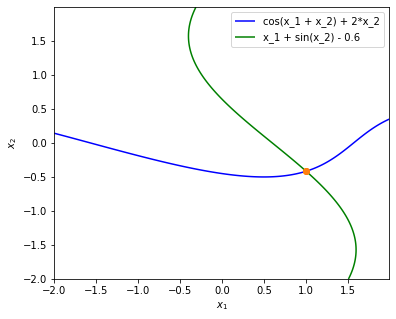

In [10]:
def find_point(arr):
    x_1 = arr[0]
    x_2 = arr[1]
    x1, x2 = sym.symbols("x1, x2")
    y = sym.cos(x1 + x2) + 2*x2
    z = x1 + sym.sin(x2) - 0.6
    df = np.array([[float(sym.diff(y, x1).subs([(x1,x_1), (x2,x_2)])), float(sym.diff(y, x2).subs([(x1,x_1), (x2,x_2)]))], 
                  [float(sym.diff(z, x1).subs([(x1,x_1), (x2,x_2)])), float(sym.diff(z, x2).subs([(x1,x_1), (x2,x_2)]))]])
    f = np.array([float(y.subs([(x1,x_1), (x2,x_2)])), float(z.subs([(x1,x_1), (x2,x_2)]))])
    return np.array([x_1 + np.linalg.solve(df, -f)[0], x_2 + np.linalg.solve(df, -f)[1]])

def func_arr(x):
    return np.array([np.cos(x[0] + x[1]) + 2*x[1], x[0] + np.sin(x[1]) - 0.6])


x0 = [-3.48, 2.49]
eps = 10**(-6)
x_prev = np.array(x0)
x_real = find_point(x0)
x_new = np.array([])
count = 1

print(f'Start point: {x_prev}')
print('---------------')
while np.linalg.norm(np.linalg.norm(find_point(x_real) - x_real, np.inf)/(1 - np.linalg.norm(find_point(x_real) - x_real, np.inf)/np.linalg.norm(x_real - x_prev, np.inf))) >= eps:
    print(np.linalg.norm(np.linalg.norm(find_point(x_real) - x_real, np.inf)/(1 - np.linalg.norm(find_point(x_real) - x_real, np.inf)/np.linalg.norm(x_real - x_prev, np.inf))))
    x_prev = x_real
    x_real = find_point(x_real)
    print(f'{count} approximation: {x_prev}')
    print('---------------')
    count += 1

print(f'Result of presented function:  {x_real}')
print(f'Result of build-in function:   {scipy.optimize.fsolve(func_arr, np.array(x0))}')

print(f'Difference in solutions: {np.max(np.abs((x_real - scipy.optimize.fsolve(func_arr, np.array(x0))).astype(np.float32)))}')

x_1, x_2 = np.meshgrid(np.arange(-2, 2, 0.005), np.arange(-2, 2, 0.005))
fig, ax = plt.subplots(figsize=(6, 5))
contour1 = plt.contour(x_1, x_2, np.cos(x_1 + x_2) + 2*x_2, [0], colors=['blue'])
contour2 = plt.contour(x_1, x_2, x_1 + np.sin(x_2) - 0.6, [0], colors=['green'])
ax.scatter(*x_prev, c="#ff7f0e", alpha=1, zorder=2)
ax.scatter(*x_prev, c="#ff7f0e", alpha=1, zorder=2)
f1,_ = contour1.legend_elements()
f2,_ = contour2.legend_elements()
ax.legend([f1[0], f2[0]], ["cos(x_1 + x_2) + 2*x_2", "x_1 + sin(x_2) - 0.6"])
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.show()

## Задача 4.5.2

Point: [16.     5.8   11.879]
Distance to P1 = 23.16831416365651
-------------
Point: [8.485 5.328 8.91 ]
Distance to P2 = 7.2955225548433065
-------------
Point: [15.     3.139  5.25 ]
Distance to P3 = 8.6682388376331
-------------
The closest point is P2
The furthest point is P1


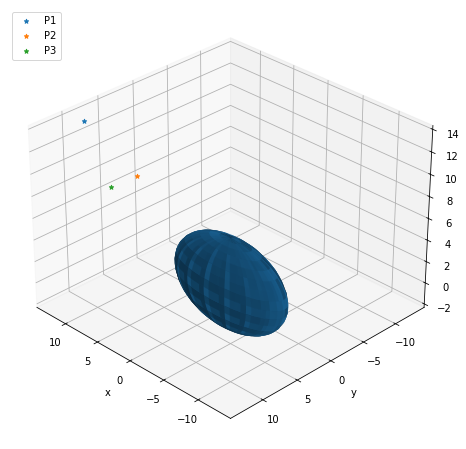

In [3]:
N = 2
a1 = 8.5 - N * 0.25
a2 = 2.3 + N * 0.3
a3 = 4 + N * 0.1
P1 = np.array([16, 5.8, 11.879])
P2 = np.array([8.485, 5.328, 8.91])
P3 = np.array([15, 3.139, 5.25])

def coordinates(q):
    phi = q[0]
    theta = q[1]
    return np.array([a1*np.sin(phi)*np.sin(theta), a2*np.cos(phi)*np.sin(theta), a3*np.cos(phi)])

def f(point):
    def func(q):
        return np.sum((coordinates(q) - point) ** 2)
    return func

def gradient(f, q, h = 1e-8):
    n = len(q)
    grad = np.empty_like(q)
    for i in range(n):
        delta = np.zeros_like(q)
        delta[i] = h
        grad[i] = (f(q + delta) - f(q-delta)) / 2 / h
    return grad

def hesse(f, q, h = 1e-8):
    n = len(q)
    hesse_matrix = np.empty((n, n), dtype=np.float64)
    for i in range(n):
        delta_i = np.zeros_like(q)
        delta_i[i] = h
        for j in range(n):
            delta_j = np.zeros_like(q)
            delta_j[j] = h
            hesse_matrix[i, j] = (f(q + delta_i + delta_j) - f(q + delta_i - delta_j) - 
            f(q - delta_i + delta_j) + f(q - delta_i - delta_j))/(4 * h * h)
    return hesse_matrix

def p(x2, x1, x0):
    norm_x2_x1 = np.max(np.abs(x2 - x1))
    norm_x1_x0 = np.max(np.abs(x1 - x0))
    return np.abs(norm_x2_x1 / (1 - norm_x2_x1/ norm_x1_x0))


def newton_method(f, x0,  eps = 1e-6):
    x1 = x0 + np.linalg.solve(hesse(f, x0), -gradient(f, x0))
    x2 = x1 + np.linalg.solve(hesse(f, x1), -gradient(f, x1))
    iter_cnt = 2
    while p(x2, x1, x0) > eps:
        x0 = x1
        x1 = x2
        try:
            x2 = x2 + np.linalg.solve(hesse(f, x2), -gradient(f, x2))
        except np.linalg.LinAlgError:
            return x2, iter_cnt
        iter_cnt += 1
    return x2, iter_cnt

def optimal(point, q0):
    func = f(point)
    q1,_ = newton_method(func, q0)
    dist = np.sqrt(func(q1))
    return dist

d1, d2, d3 = optimal(P1, [np.pi/6, np.pi/4]), optimal(P2, [np.pi/3, np.pi/4]), optimal(P3, [np.pi/4, np.pi/5])

print(f"Point: {P1}")
print(f"Distance to P1 = {d1}")
print("-------------")
print(f"Point: {P2}")
print(f"Distance to P2 = {d2}")
print("-------------")
print(f"Point: {P3}")
print(f"Distance to P3 = {d3}")
print("-------------")
print(f"The closest point is P{np.argmin([d1, d2, d3]) + 1}")
print(f"The furthest point is P{np.argmax([d1, d2, d3]) + 1}")

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

phi = np.linspace(0, 3 * np.pi, 100)
theta = np.linspace(0, 3 * np.pi, 100)
x = a1 * np.outer(np.cos(theta), np.sin(phi))
y = a2 * np.outer(np.sin(theta), np.sin(phi))
z = a3 * np.outer(np.ones_like(theta), np.cos(phi))

ax.plot_surface(x, y, z,  rstride=4, cstride=4, alpha = 0.5)
ax.scatter(*P1, marker='*', label = "P1")
ax.scatter(*P2, marker='*', label = "P2")
ax.scatter(*P3, marker='*', label = "P3")
ax.view_init(30, 135, 0)
ax.set_xlim(-14, 14)
ax.set_ylim(-14, 14)
ax.set_zlim(-2, 14)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.legend(loc="upper left")
plt.show()

## Задача 5.1.8

In [12]:
A = np.array([
    [118.8, -14, -5, -89.1],
    [-59.4, 194, 5, 128.7],
    [148.5, 12, -310, 148.5],
    [0, 18.5, 90, -108.9]
])
b = np.array([-92.5, -340.1, -898, 184.1])

def zeid(A, b, x):
    B = np.empty((len(A),len(A)))
    c = np.empty((len(A),1))
    for i in range(len(A)):
        B[i] = -A[i]/A[i][i]
        c[i] = b[i]/A[i][i]
    B1 = np.tril(B, -1)
    B2 = np.triu(B, 1)

    x_new = np.zeros(len(A))
    for i in range(len(x)):
        x_new[i] = np.dot(B1[i], x_new) + np.dot(B2[i], x) + c[i]
    return x_new

gauss = np.linalg.solve(A, b)

B = np.empty((len(A),len(A)))
c = np.empty((len(A),1))
for i in range(len(A)):
    B[i] = -A[i]/A[i][i]
    c[i] = b[i]/A[i][i]
B1 = np.tril(B, -1)
B2 = np.triu(B, 1)
print(f"Sufficient convergence condition is completed: {np.linalg.norm(B2, np.inf)} < 1")
print(f"------------------")

eps = np.linalg.norm(((1 - np.linalg.norm(B, np.inf))/np.linalg.norm(B2, np.inf)))*10**(-6)

num = 0
x = [0.6, 2.3, -2.8, -1.35]
print(f"Start approach: {x}")
while num <= 10:
    x = zeid(A, b, x)
    num += 1
print(f"Method Gauss solution:     {gauss}")
print(f"Solution of zeid function (10 iterations): {x}")
print(f"Difference in solution: {np.linalg.norm(gauss - x, np.inf)}")
print(f"------------------")

print(f"Start approach: {x}")
x_prev = np.array(x)
x_real = zeid(A, b, x)
count = 0
while np.linalg.norm(x_prev - x_real, np.inf) >= eps:
    count += 1
    x_prev = x_real
    x_real = zeid(A, b, x_real)
print(f"Method Gauss solution:                          {gauss}")
print(f"Solution of zeid function (epsilon with norm) : {zeid(A, b, x_real)} was reached by {count} iterations")
print(f"Difference in solution: {np.linalg.norm(gauss - zeid(A, b, x_real), np.inf)}")
print(eps)
print(f"------------------")

num = 0
x = [10, 10, 10, 10]
print(f"Start approach: {x}")
while num <= 10:
    x = zeid(A, b, x)
    num += 1
print(f"Method Gauss solution:     {gauss}")
print(f"Solution of zeid function: {x}")
print(f"Difference in solution: {np.linalg.norm(gauss - x, np.inf)}")
print(f"------------------")

x = [10, 10, 10, 10]
print(f"Start approach: {x}")
x_prev = np.array(x)
x_real = zeid(A, b, x)
count = 0
while np.linalg.norm(x_prev - x_real, np.inf) >= eps:
    count += 1
    x_prev = x_real
    x_real = zeid(A, b, x_real)
print(f"Method Gauss solution:                          {gauss}")
print(f"Solution of zeid function (epsilon with norm) : {zeid(A, b, x_real)} was reached by {count} iterations")
print(f"Difference in solution: {np.linalg.norm(gauss - zeid(A, b, x_real), np.inf)}")
print(eps)
print(f"------------------")

Sufficient convergence condition is completed: 0.9099326599326599 < 1
------------------
Start approach: [0.6, 2.3, -2.8, -1.35]
Method Gauss solution:     [-1.08080808 -2.          2.2        -0.21212121]
Solution of zeid function (10 iterations): [-1.0834348  -1.99821921  2.19703906 -0.21426575]
Difference in solution: 0.0029609446929881322
------------------
Start approach: [-1.0834348  -1.99821921  2.19703906 -0.21426575]
Method Gauss solution:                          [-1.08080808 -2.          2.2        -0.21212121]
Solution of zeid function (epsilon with norm) : [-1.08080882 -1.9999995   2.19999917 -0.21212182] was reached by 13 iterations
Difference in solution: 8.345344979510116e-07
1.095437319089254e-06
------------------
Start approach: [10, 10, 10, 10]
Method Gauss solution:     [-1.08080808 -2.          2.2        -0.21212121]
Solution of zeid function: [-1.04338179 -2.02537322  2.24218847 -0.18156512]
Difference in solution: 0.0421884748326713
------------------
Start app

## Задача 5.5.1

Is matrix A symmetrical: True
Is matrix A positive: True
-----------
Start approach: [0, 0, 0, 0, 0]
-----------
Method Gauss solution:         [ 0.04424026 -0.08535775  0.62794735  0.67068044  0.6051265 ]
Solution of relaxation method: [ 0.04423548 -0.08535637  0.6279469   0.67067998  0.6051239 ]
Difference in solutions: 4.7814813206384366e-06
-----------
Relaxation parameter for minimum iterations: 1.2
Number of iterations for omega: [83, 42, 26, 17, 11, 9, 14, 24, 54]


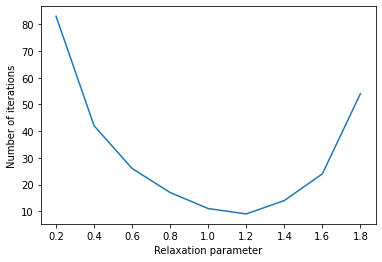

In [5]:
A = np.array([
    [3.5, -1, 0.9, 0.2, 0.1],
    [-1, 7.3, 2, 0.3, 2],
    [0.9, 2, 4.9, -0.1, 0.2],
    [0.2, 0.3, -0.1, 5, 1.2],
    [0.1, 2, 0.2, 1.2, 7]
])
b = np.array([1, 2, 3, 4, 5])

def zeid_mod(A, b, x, omega):
    B = np.empty((len(A), len(A)))
    c = np.empty((len(A),1))
    for i in range(len(A)):
        B[i] = -A[i]/A[i][i]
        c[i] = b[i]/A[i][i]
    B1 = np.tril(B, -1)
    B2 = np.triu(B, 1)

    x_new = np.zeros(len(A))
    for i in range(len(x)):
        x_h = np.zeros(len(A))
        x_new[i] = (1 - omega)*x[i] + omega*(np.dot(B1[i], np.hstack((x_new[:i], x_h[i:]))) + np.dot(B2[i], np.hstack((x_h[:i+1], x[i+1:]))) + c[i])
    return x_new

print(f"Is matrix A symmetrical: {np.all(A==A.T)}")
print(f"Is matrix A positive: {np.all(np.linalg.eigvals(A) > 0)}")
print("-----------")

x0 = [0, 0, 0, 0, 0]
print(f"Start approach: {x0}")
print("-----------")
eps = 10**(-5)
num_of_it = []
omega = [om for om in np.arange(0.2, 2, 0.2)]
for om in omega:
    x_prev = np.array(x0)
    x_real = zeid_mod(A, b, x0, 0.2)
    count = 0
    while np.linalg.norm(x_prev - x_real, np.inf) >= eps:
        count += 1
        x_prev = x_real
        x_real = zeid_mod(A, b, x_real, om)
    num_of_it.append(count)

print(f"Method Gauss solution:         {np.linalg.solve(A, b)}")
print(f"Solution of relaxation method: {x_real}")
print(f"Difference in solutions: {np.linalg.norm(np.linalg.solve(A, b) - x_real, np.inf)}")
print("-----------")
print(f"Relaxation parameter for minimum iterations: {omega[num_of_it.index(min(num_of_it))]}")
print(f"Number of iterations for omega: {num_of_it}")

plt.plot(omega, num_of_it)
plt.xlabel("Relaxation parameter")
plt.ylabel("Number of iterations")
plt.show()